# Introduction

The role of this project is to do a manual implementation of K-means Clustering in order to understand the algorithm and be able to use it in future projects. Moreover, my motivation is to undestand also how the algo works in order to be able to use the K-Means sci-kit library more confidently in the future. An attempt to break the blackbox

In [3]:
# importing the libraries

import pandas as pd
import numpy as np
import random as rand
import re
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

from collections import Counter
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Installing the kneed package.
# Uncomment and Re-run it when running the notebook again if using scikit-learn
# At the moment, I went for a manual application of the algorithm 

# !pip install kneed
# !pip install scikit-learn ipython

# visualisation setup
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline


# Data Loading and Basic Analysis

In [4]:
# importing the dataset

iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 
                  'sepal_width', 
                  'petal_length', 
                  'petal_width', 
                  'class']

iris = pd.read_csv(iris_url, names= col_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
class BasicAnalysis:

  def __init__(self, data):
    self.data = data

  def analysis(self):
    column_list = self.data.columns.tolist()
    print("Name of the columns:", column_list)
    print('\n')

    # checking for columns with missing data
    columns_with_missing_data = self.data.columns[self.data.isnull().any()].tolist()
    print("Columns with missing data:", columns_with_missing_data)
    print('\n')

    # generating general statistics about the data
    general_stats = self.data.describe()
    print("General statistics: \n", general_stats)
    print('\n')

    summary_stats = self.data.info
    print("Summary statistics: \n", summary_stats)



In [6]:
# storing the class object in a variable and calling the function inside it
obj = BasicAnalysis(iris)
obj.analysis()

Name of the columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']


Columns with missing data: []


General statistics: 
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Summary statistics: 
 <bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2   

Each of the numerical column values is expressed in cm. 

There are no columns with missing data.

# Exploratory Data Analysis

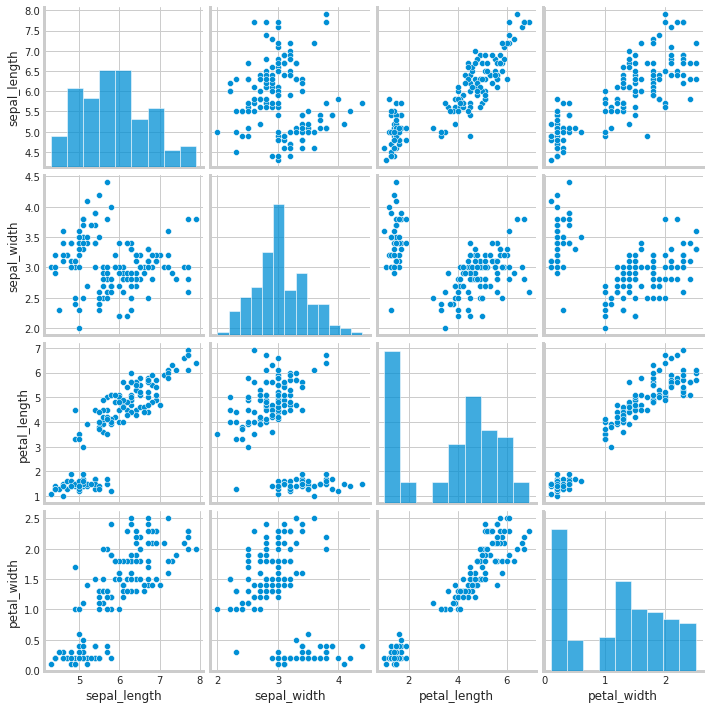

In [7]:
sns.pairplot(data=iris)

In [8]:
iris.rename(columns= {'class': 'Species'}, inplace= True)

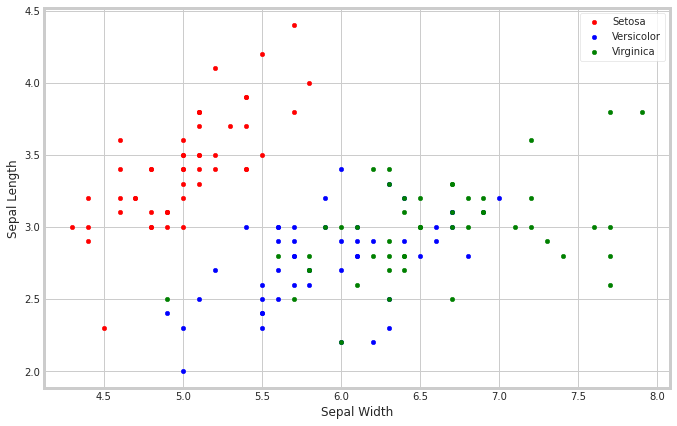

In [9]:
fig = iris[iris['Species'] == 'Iris-setosa'].plot(
              kind='scatter',
              x= 'sepal_length', 
              y= 'sepal_width',
              color= 'red',
              label= 'Setosa')

iris[iris['Species'] == 'Iris-versicolor'].plot(
          kind= 'scatter',
          x = 'sepal_length',
          y = 'sepal_width',
          color = 'blue',
          label= 'Versicolor',
          ax = fig)

iris[iris['Species'] == 'Iris-virginica'].plot(
          kind = 'scatter',
          x = 'sepal_length',
          y = 'sepal_width',
          color = 'green',
          label = 'Virginica',
          ax = fig)

fig.set_xlabel("Sepal Width")
fig.set_ylabel("Sepal Length")

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

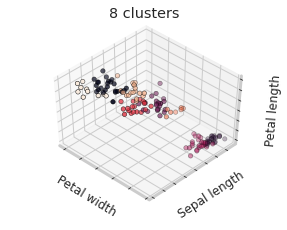

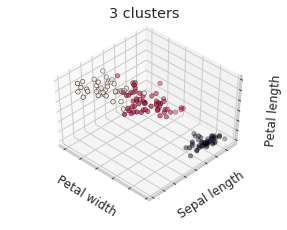

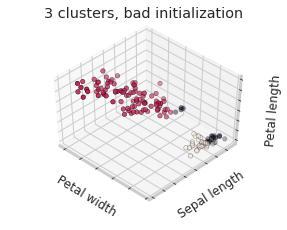

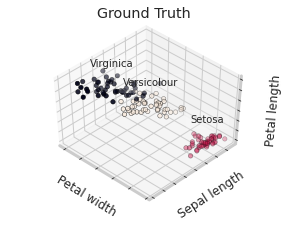

In [10]:
import mpl_toolkits.mplot3d
from sklearn import datasets

iris_3d = datasets.load_iris()
X = iris_3d.data
y = iris_3d.target

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fignum = 1
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 3].mean(),
        X[y == label, 0].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

fig.show()

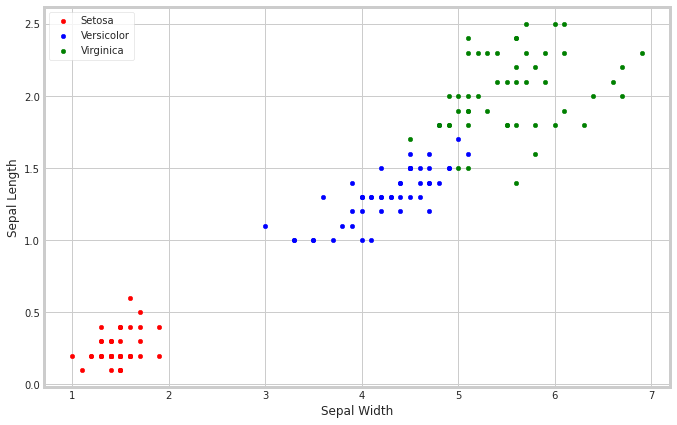

In [11]:
fig = iris[iris['Species']== 'Iris-setosa'].plot(
              kind='scatter',
              x= 'petal_length', 
              y= 'petal_width',
              color= 'red',
              label= 'Setosa')

iris[iris.Species == 'Iris-versicolor'].plot(
          kind= 'scatter',
          x= 'petal_length', 
          y= 'petal_width',
          color = 'blue',
          label= 'Versicolor',
          ax = fig)

iris[iris.Species == 'Iris-virginica'].plot(
          kind = 'scatter',
          x= 'petal_length', 
          y= 'petal_width',
          color = 'green',
          label = 'Virginica',
          ax = fig)

fig.set_xlabel("Sepal Width")
fig.set_ylabel("Sepal Length")

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

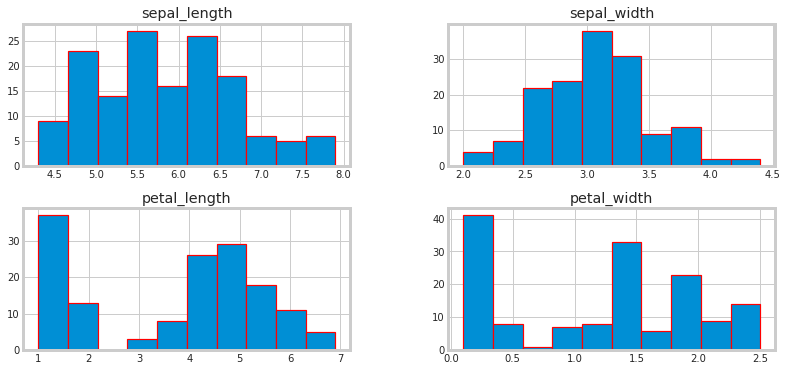

In [12]:
iris.hist(edgecolor= 'red', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

# K-Means

## Helper Functions

### Choosing the number of centroids

In [13]:
# Uncomment this section if we need the data as an array

# splitting the numerical data and the categorical data 

iris_species = iris['Species']
iris.drop(columns='Species', inplace=True)

# turning the dataframe to a numpy array list

iris_array = np.array(iris)
# iris_array

Silhouette score for 2 clusters is: 0.6808136202936816
Silhouette score for 3 clusters is: 0.5525919445499757
Silhouette score for 4 clusters is: 0.4972279726640147
Silhouette score for 5 clusters is: 0.4885175508886279
Silhouette score for 6 clusters is: 0.37121805054590085
Silhouette score for 7 clusters is: 0.35367730489680843
Silhouette score for 8 clusters is: 0.3505888856671688
Silhouette score for 9 clusters is: 0.3329671622965964
Silhouette score for 10 clusters is: 0.31654183131028324
Silhouette score for 11 clusters is: 0.2990532667554256


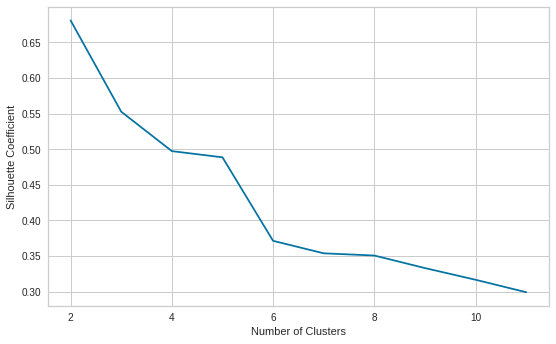

Optimum number of Clusters: 2


In [14]:
#from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

k_clusters = []
sil_coefficients = []

for n_cluster in range (2, 12):
  KMean = KMeans (n_clusters = n_cluster, random_state=1).fit(iris_array)
  label = KMean.labels_
  

  # Calculate silhouette score
  sil_score = silhouette_score(iris_array, KMean.labels_, metric= 'euclidean')
  print("Silhouette score for {} clusters is: {}".format(n_cluster, sil_score))
  k_clusters.append(n_cluster)
  sil_coefficients.append(sil_score)

plt.plot(k_clusters, sil_coefficients)
plt.ylabel("Silhouette Coefficient")
plt.xlabel('Number of Clusters')
plt.show()

sil_best_score = max(sil_coefficients)
k_best_index = sil_coefficients.index(sil_best_score)
k_best = k_clusters[k_best_index]
print("Optimum number of Clusters:", k_best)

The technique indicates that the optimum number of clusters is 2. But how accurate is this? 

I will use the `SilhouetteVisualizer` method to graphically show the optimal amount of clusters.

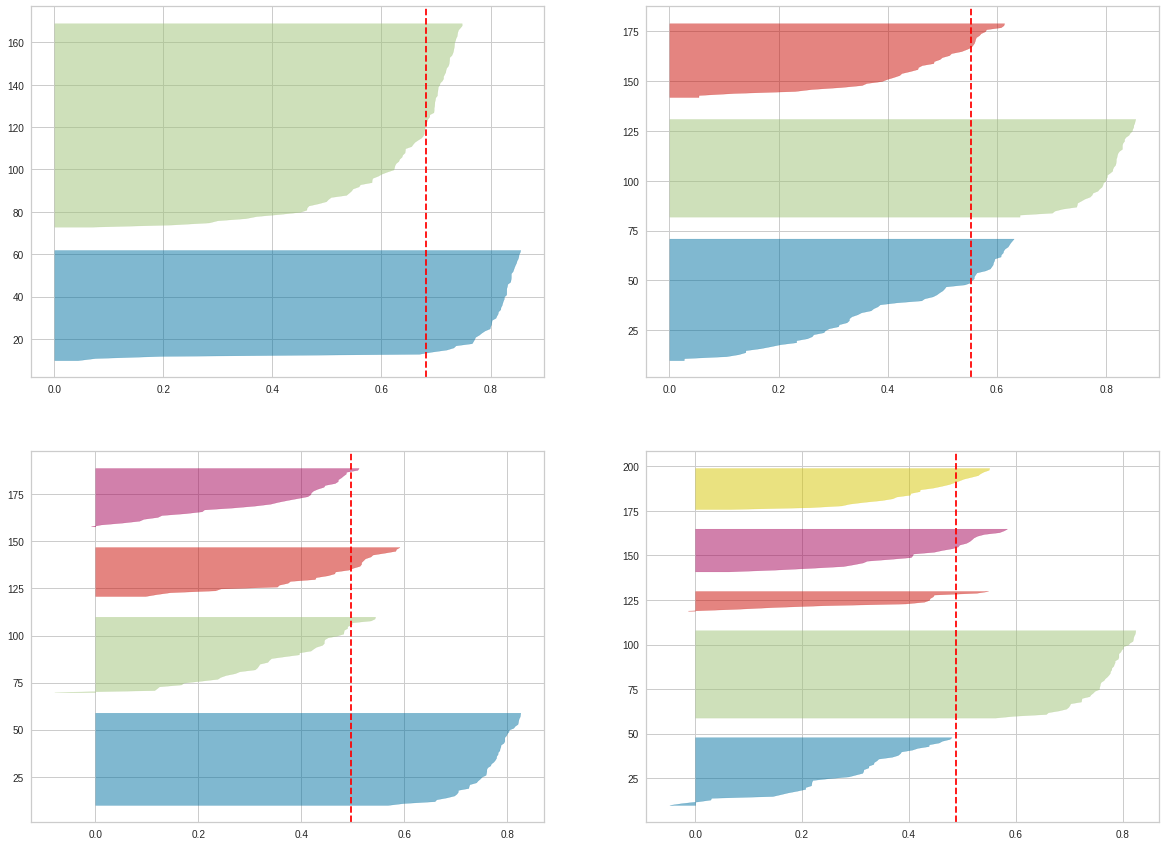

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(18,15))

for i in [2, 3, 4, 5]:
  KMean = KMeans(n_clusters = i, random_state=1)
  q, mod = divmod(i, 2)
  visualizer = SilhouetteVisualizer(KMean, colors='yellowbrick', ax= ax[q-1][mod])
  visualizer.fit(iris)

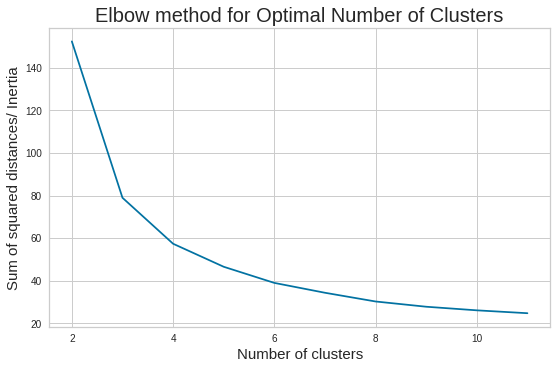

In [16]:
# Using the Elbow Method

sum_of_squared_distances = []
k= range(2, 12)

for n_cluster in k:
  KMean = KMeans(n_clusters= n_cluster, random_state=1).fit(iris) # or iris_array
  sum_of_squared_distances.append(KMean.inertia_)

plt.plot(k, sum_of_squared_distances, 'bx-')
plt.xlabel("Number of clusters", size= 15)
plt.ylabel("Sum of squared distances/ Inertia", size= 15)
plt.title("Elbow method for Optimal Number of Clusters", size = 20)
plt.show()

Both the Silhouette and Elbow method indicate towards using 4 clusters. Therefore, the manual implementation of the KMeans algo will be done using `n_clusters = 4`

## Implementation #1


In [22]:
# #@title Default title text
# # assign centroids

# def assign_centroid(dataset, centroids):
#   '''
#   Given a dataset and a set of "centroids", we assign each data point in dataset
#   to a centroid.
#   - dataset = dataframe/array/vectors with observations
#   - centroids = the already established centroids by using `random_centroids` function
#   '''
#   k = centroids
#   n = dataset
#   assignation = []
#   assign_distance = []
  
#   for obs in range(len(n)):
#     # Estimate the distance
#     all_distance = np.array([])
#     for centroid in range(len(k)):
#       distance = np.linalg.norm(np.array(obs) - np.array(centroid))
#       all_distance = np.append(all_distance, distance)   

#     # Get the nearest centroid and the error
#     nearest_centroid = np.where(all_distance==np.amin(all_distance))[0].tolist()[0]
#     nearest_centroid_distance = np.amin(all_distance)
        
#     # Add values to the initial lists
#     assignation.append(nearest_centroid)
#     assign_distance.append(nearest_centroid_distance)

#   return assignation, assign_distance



In [24]:
# from tables.utils import dump_logged_instances

# def kmeans_func (dataset, k=3, distance_tolerance= 0.1, max_iterations= 500):
#   data = np.copy(dataset) # creating a copy of the original numpy array to not mess the data
#   distance = [] # variable to store the distance
#   reiterate = True # variable acting as a stopping signal 
#   iterations_counter = 0 # a counter for iterations

#   # Initiating the clusters by defining the centroids
#   centroids = random_centroids(data, k)
#   centroids_ds = pd.DataFrame(centroids)
#   iris_df = pd.DataFrame(data)

#   while(reiterate):
#     # assigning the centroids and calculating the distance
#     iris_df.loc[:, 4] = assign_centroid(data, centroids)[0]
#     data_point_distance = assign_centroid(data, centroids)[1]
#     # data = np.append(data, assign_centroid(data, centroids)[0])
#     # data_point_distance = assign_centroid(data, centroids)[1]
#     distance.append(sum(data_point_distance))

#     # updating the centroid position
#     centroids = pd.DataFrame(iris_df).groupby(4).agg('mean').reset_index(drop=True)
#     # centroids = data.groupby('centroid').agg('mean').reset_index(drop=True)

#     # reitare the previous steps until we reach the desired tolerance
#     if iterations_counter > 0:
#       # is the distance less than the tolerance we set
#       if distance[iterations_counter - 1] - distance[iterations_counter] <= distance_tolerance:
#         reiterate = False

#     iterations_counter += 1

#     if iterations_counter > max_iterations:
#       break

    
#     iris_df.iloc[:,4] = assign_centroid(data, centroids)[0]
#     data_point_distance = assign_centroid(data, centroids)[1]
#     # iris_df.loc['centroid'], data_point_distance = assign_centroid(data, centroids)
#     centroids = iris_df.groupby(4).agg('mean').reset_index(drop=True)

#   return iris_df.iloc[:,4], data_point_distance, centroids

## Implemention #2

### Setting Centroids

In [17]:
# function that will randomly select centroids from the dataset

def random_centroids(dataset, K):    
    centroids = []
    #Place K centroids at random locations
    for i in range(K):
        centroid = dataset[rand.randint(0, 149)]
        centroids.append(centroid)
    return centroids

### Assign all data points to the closest centroid

In [37]:
def assign_cluster(dataset, centroids):
  # list that will store the assignments to the centroids
  assignments = []

  for data_point in dataset:
    # list that will store the distances to the cluster for each data point
    dist_point_cluster = []

    for centroid in centroids:
      # NumPy function for Euclidean Distance using np.linalg.norm which has L2 norm
      d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
      dist_point_cluster.append(d_clust)

    assignment = np.argmin(dist_point_cluster)
    assignments.append(assignment)

  return assignments

### Compute new centroids

By computing the mean of all the points assigned to each cluster

In [38]:
def new_centroids(dataset, centroids, assingments, K):
  new_centroids = []

  for i in range(K):
        pt_cluster = []
      
        for x in range(len(dataset)):
            if (assingments[x] == i):
                pt_cluster.append(dataset[x])
    
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

  return new_centroids

### Compute the Sum of Squared Errors (SSE) as a stopping criteria

Create a function that calculates SSE for each iteration.

To do that, we will loop through each data point and compute the distance/error with its assigned centroid. We square the error and add it to the `errors` list. We then sum all errors to obtain SSE

In [39]:
def sse(dataset, assignments, centroids):
    errors = []

    for i in range(len(dataset)):
        # get the assigned centroids for each data point
        centroid = centroids[assignments[i]]

        # compute the distance(error) between one point and its closest centroid
        error = np.linalg.norm(np.array(dataset[i]) - np.array(centroid))

        #append the squared error to the list errors
        errors.append(error)
    
    # sum all erorrs
    sse = sum(errors)
    return sse

In [40]:
def kmeans_clustering(dataset, K, max_iter= 300, tol= pow(10,-3)):
    it= -1
    all_sse =[]
    assignments = []

    #Place K centroids at random locations
    centroids = random_centroids(dataset, K)

    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        # assignt the points to the closes center
        assignments = assign_cluster(dataset, centroids)

        # compute new centroids
        centroids = new_centroids(dataset,centroids, assignments, K)

        # compute SSE
        sse_kmeans = sse(dataset, assignments, centroids)
        all_sse.append(sse_kmeans)
    
    return(assignments, centroids, all_sse, it)

In [43]:
result = kmeans_clustering(iris_array, K=3)
result

([1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  0,
  0,
  2,
  2,
  2,
  2,
  0,
  2,
  0,
  2,
  0,
  2,
  2,
  0,
  0,
  2,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  0,
  2,
  2,
  2,
  0,
  2,
  2,
  0],
 [array([5.9016129 , 2.7483871 , 4.39354839, 1.43387097]),
  array([5.006, 3.418, 1.464, 0.244]),
  array([6.85      , 3.07368421, 5.74210526, 2.07105263])],
 [100.12203877454327, 97.7405269609475, 97.32592423430007, 97.32592423430007],
 3)

### Vizualization of Implementation #2

In [68]:
centroids_x = [result[1][x][0] for x in range(len(result[1]))]
centroids_y = [result[1][x][2] for x in range(len(result[1]))]

In [69]:
x = iris['sepal_length']
y = iris['petal_length']
assignments = result[0]

Text(0, 0.5, 'petal_length')

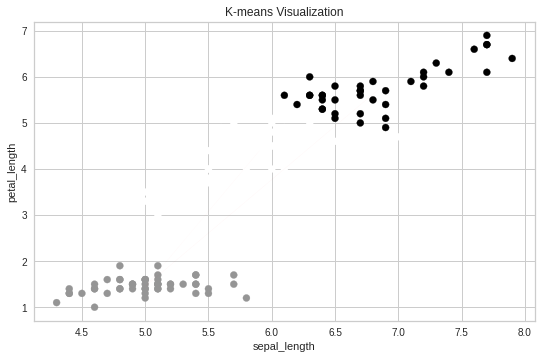

In [75]:
plt.scatter(x, y, c=assignments)
plt.plot(centroids_x,
         centroids_y, 
         c='red', 
         marker='+', 
         linewidth='0.01', 
         markerfacecolor='red', 
         markersize=22)

plt.title("K-means Visualization")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")

In [57]:
type(iris_array)

numpy.ndarray

In [80]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20, max_iter=300, verbose=1, random_state= 0)
kmeans.fit(iris_array)
y_kmeans = kmeans.predict(iris_array)

Initialization complete
Iteration 0, inertia 98.34
Iteration 1, inertia 83.34831944444448
Iteration 2, inertia 82.34796145640075
Iteration 3, inertia 81.41746489357331
Iteration 4, inertia 80.14882662005539
Iteration 5, inertia 79.66525726935403
Iteration 6, inertia 79.08689895643232
Iteration 7, inertia 78.94506582597731
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 116.96000000000001
Iteration 1, inertia 82.5543245769456
Iteration 2, inertia 79.28654263977782
Iteration 3, inertia 78.940841426146
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 167.00000000000006
Iteration 1, inertia 85.80604237365992
Iteration 2, inertia 80.100347352311
Iteration 3, inertia 79.25791704724695
Iteration 4, inertia 79.01070972222222
Iteration 5, inertia 78.94506582597731
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 94.86
Iteration 1, inertia 82.9589329256554
Iteration 2, i

In [ ]:
x_transform = kmeans.transform(iris)
x_transform

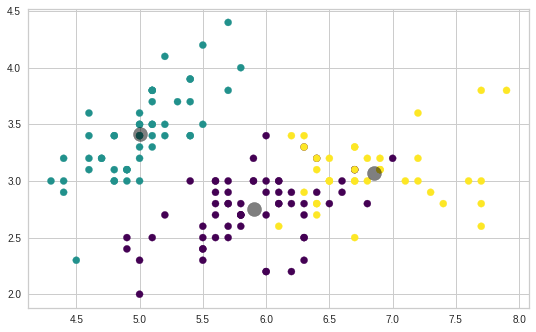

In [78]:
}plt.scatter(iris.iloc[:,0], iris.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

# Questions

1. Can we pass the information as a dataframe in the KMeans algorithm or should we transform it into an array? Why?

2. When should we transform the dataframe in a numpy array?
  - depends on the functions that we build
  - if KMeans from scikit-learn require np array
  - transforming the dataframe into a numpy array allows us to easily work with vectors, thus taking into account multiple features.

3. I find on the internet that in some cases, there are people who choose 3 clusters, using the elbow method ([link](!https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset)), but my analysis using both the silhouette score/vizualizer and the elbow method have led me to choose 4 clusters. How is it correct?
